In [1]:
# !pip install idsl-gauge

In [2]:
from idsl_gauge import IDSLGauge
import datetime
import os

In [3]:
os.environ['IDSL_GROUP'] = 'Indonesia'
os.environ['IDSL_LATENCY_MINUTE'] = '60'
os.environ['IDSL_WINDOW_MINUTE'] = '10'

In [4]:
# IDSL environment variables
group = os.environ.get('IDSL_GROUP')
max_latency = int(os.environ.get('IDSL_LATENCY_MINUTE'))
minutes = int(os.environ.get('IDSL_WINDOW_MINUTE'))

In [5]:
# Get station metadata
gauges = IDSLGauge(group, max_latency)
gauges.get_metadata()

In [6]:
gauges.metadata.head()

,Longitude,Latitude,Name,Sensor,Location,Country,Region,Provider,Latency_Seconds
id,,,,,,,,,
206,105.512106,-5.936047,IDSL-301,RAD,Sebesi,Indonesia,Lampung,JRC-MMAF,11
207,105.841088,-6.189322,IDSL-302,RAD,Marina Jambu,Indonesia,Banten,JRC-MMAF,19
208,99.585453,-2.037654,IDSL-303,RAD,Mentawai Tua Pejat,Indonesia,West Sumatra,JRC-MMAF,4
483,100.396191,-1.029661,IDSL-305,RAD,Bungus Port,Indonesia,West Sumatra,JRC-MMAF,5
484,110.799053,-8.190314,IDSL-306,RAD,Sadeng Port,Indonesia,Daerah Istimewa Yogyakarta,JRC-MMAF,10


In [7]:
gauges.stations

['206', '207', '208', '483', '484']

In [8]:
end = datetime.datetime.utcnow()
start = end - datetime.timedelta(minutes = minutes)
station = gauges.stations[0]

In [9]:
df = gauges.get_gauges_data(station, start, end)
df['Latitude'] = gauges.metadata.loc[station].Latitude
df['Longitude'] = gauges.metadata.loc[station].Longitude
df['StationID'] = station
df.tail()

,WaterLevelRadar,SolarPanel,RmsLimit,CPUTemperature,AmbientTemperature,Alert,AlertSignal,Battery,Forecast30,Forecast300,Latitude,Longitude,StationID
Timestamp,,,,,,,,,,,,,
2021-06-21 03:30:24,0.694847,-5.5,0.006166,46.5,24.611229,0.0,0.010225,12.807974,0.690672,0.680448,-5.936047,105.512106,206
2021-06-21 03:30:35,0.682906,-5.5,0.006167,46.5,24.623264,0.0,0.010261,12.773579,0.690792,0.680531,-5.936047,105.512106,206
2021-06-21 03:30:46,0.689857,-5.5,0.006169,46.5,24.608559,0.0,0.012029,12.766147,0.692815,0.680786,-5.936047,105.512106,206
2021-06-21 03:30:57,0.691782,-5.5,0.006168,46.5,24.637985,0.0,0.013267,12.738335,0.694399,0.681132,-5.936047,105.512106,206
2021-06-21 03:31:08,0.679104,-5.5,0.006168,46.5,24.628616,0.0,0.010936,12.779099,0.692098,0.681162,-5.936047,105.512106,206


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Timestamp'>

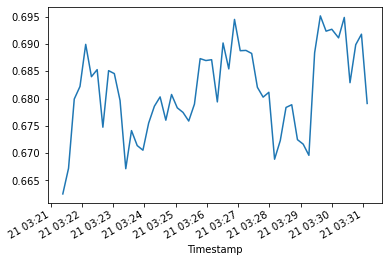

In [11]:
df.WaterLevelRadar.plot()